<a href="https://colab.research.google.com/github/EDSONRRs/DIPLOMADO/blob/main/Tarea_flight_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
df=pd.DataFrame(pd.read_csv('/content/flight_price.csv'))
df.head()

Unnamed: 0   airline   flight source_city departure_time stops  \
0           0  SpiceJet  SG-8709       Delhi        Evening  zero   
1           1  SpiceJet  SG-8157       Delhi  Early_Morning  zero   
2           2   AirAsia   I5-764       Delhi  Early_Morning  zero   
3           3   Vistara   UK-995       Delhi        Morning  zero   
4           4   Vistara   UK-963       Delhi        Morning  zero   

    arrival_time destination_city    class  duration  days_left  price  
0          Night           Mumbai  Economy      2.17          1   5953  
1        Morning           Mumbai  Economy      2.33          1   5953  
2  Early_Morning           Mumbai  Economy      2.17          1   5956  
3      Afternoon           Mumbai  Economy      2.25          1   5955  
4        Morning           Mumbai  Economy      2.33          1   5955

In [ ]:
df.describe()

Unnamed: 0       duration      days_left          price
count  300153.000000  300153.000000  300153.000000  300153.000000
mean   150076.000000      12.221021      26.004751   20889.660523
std     86646.852011       7.191997      13.561004   22697.767366
min         0.000000       0.830000       1.000000    1105.000000
25%     75038.000000       6.830000      15.000000    4783.000000
50%    150076.000000      11.250000      26.000000    7425.000000
75%    225114.000000      16.170000      38.000000   42521.000000
max    300152.000000      49.830000      49.000000  123071.000000

In [ ]:
df.describe(include = 'object')

airline  flight source_city departure_time   stops arrival_time  \
count    300153  300153      300153         300153  300153       300153   
unique        6    1561           6              6       3            6   
top     Vistara  UK-706       Delhi        Morning     one        Night   
freq     127859    3235       61343          71146  250863        91538   

       destination_city    class  
count            300153   300153  
unique                6        2  
top              Mumbai  Economy  
freq              59097   206666

In [ ]:
airo=df.airline.value_counts()
airo

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [ ]:
airo=pd.DataFrame(airo)
airo

count
airline          
Vistara    127859
Air_India   80892
Indigo      43120
GO_FIRST    23173
AirAsia     16098
SpiceJet     9011

In [ ]:
airo1= airo.reset_index()
airo1

airline   count
0    Vistara  127859
1  Air_India   80892
2     Indigo   43120
3   GO_FIRST   23173
4    AirAsia   16098
5   SpiceJet    9011

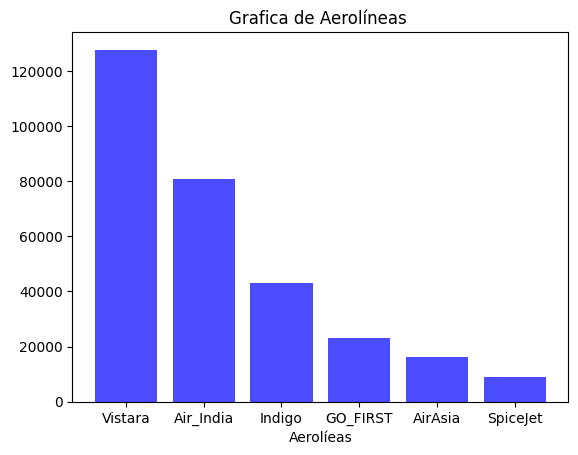

In [ ]:
plt.bar(airo1['airline'], airo1['count'], color='blue', alpha=0.7)
plt.title('Grafica de Aerolíneas ')
plt.xlabel('Aerolíeas')
plt.show()

Predominan Vistara y Air India

In [ ]:
airli = df['airline'].unique()
datair = [df[df['airline'] == airline]['price'].values for airline in airli]

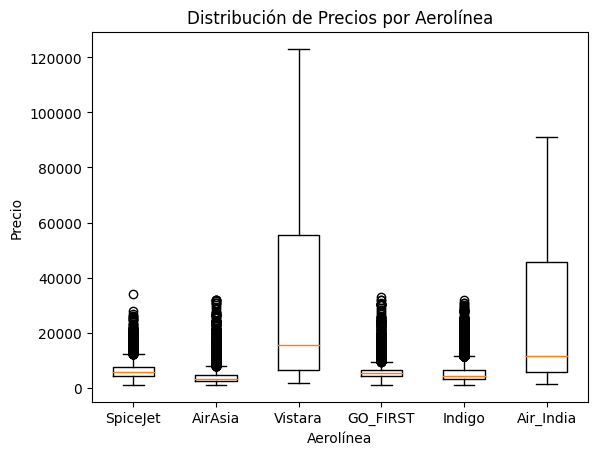

In [ ]:

plt.boxplot(datair, labels=airli)
plt.title('Distribución de Precios por Aerolínea')
plt.xlabel('Aerolínea')
plt.ylabel('Precio')
plt.show()

In [ ]:
promAerolinea = df.groupby('airline')['price'].agg(['mean', 'std'])
promAerolinea.columns = ['mean_price', 'std_price']
promAerolinea

mean_price     std_price
airline                              
AirAsia     4091.072742   2824.055172
Air_India  23507.019112  20905.116909
GO_FIRST    5652.007595   2513.865560
Indigo      5324.216303   3268.894831
SpiceJet    6179.278881   2999.630406
Vistara    30396.536302  25637.159445

Podemos notar que hay una gran diferencia entre los vuelos de las Aerolineas Air india y Vistara esto en los graficos anteriores, pero en cuanto al valor de precio tambien podemos ver una gran brecha, pues el promedio de vuelo por Vistara por ejemplo es muchisimo mas grande que el de AirAsia al igual que si lo comparamos con Air India, por lo que la diferencia es considerable, de igual manera en estas dos Aerolíneas con mayor promedio podemos notar que su varianza es incluso mayor que el precio promedio de Tercer aerolinea mas cara (SpiceJet)
por lo que la RESPUESTA A LA PRIMERA PREGUNTA es que si existe una diferencia de precio entre las aerolineas

In [ ]:
df.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

In [ ]:
df.price.describe()

count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64

In [ ]:
fig = px.histogram(df, x = 'price', nbins = 30, title = 'Distribución precio')
fig.update_layout(xaxis_title = 'Precio', yaxis_title = 'Frecuencia', template = 'plotly_white', bargap = 0.2)
fig.show()

In [ ]:
fig = px.box(df.price, title = 'Boxplot de Precio')#Box plot del precio
fig.update_layout(xaxis_title = 'Precio', yaxis_title = 'Values', template = 'plotly_white')
fig.show()

In [ ]:
corre = df['price'].corr(df['days_left'])
corre

-0.0919485321714385

existe una gran relacion entre el precio y los dias de anticipación

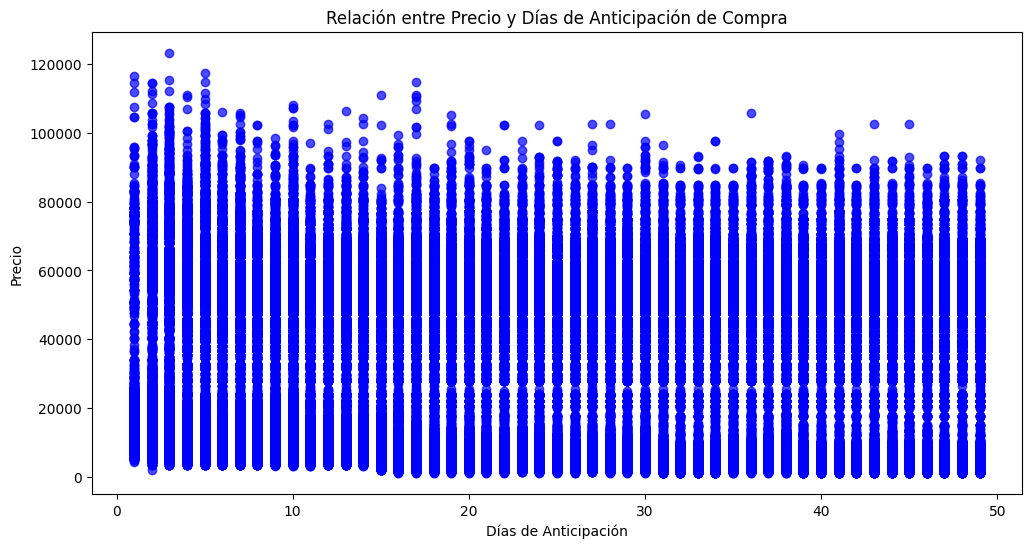

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(df['days_left'], df['price'], color='blue', alpha=0.7)
plt.title('Relación entre Precio y Días de Anticipación de Compra')
plt.xlabel('Días de Anticipación')
plt.ylabel('Precio')
plt.show()

In [ ]:
X = df[['days_left']]
y = df['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:

svm = SVR()
svm.fit(X_train_scaled, y_train)

tratamos de hacer un modelo para ver como se relaciona el precio respecto a los dias de anticipacion pero la limitacion computacional no nos dejo llevar todos los modelos a cabo

RESPUESTA 2: Respecto a el analisis de como se comporta las variables en los graficos y en cuanto a la matriz de correlación y el grafico de disperción podemos notar como esta altamente ligado el precio respecto a los dias de anticipación.

In [ ]:
depar=pd.DataFrame(df.departure_time.value_counts())
depar

count
departure_time       
Morning         71146
Early_Morning   66790
Evening         65102
Night           48015
Afternoon       47794
Late_Night       1306

In [ ]:
depar=depar.reset_index()
depar

index departure_time  count
0      0        Morning  71146
1      1  Early_Morning  66790
2      2        Evening  65102
3      3          Night  48015
4      4      Afternoon  47794
5      5     Late_Night   1306

In [ ]:
df.departure_time.describe()

count      300153
unique          6
top       Morning
freq        71146
Name: departure_time, dtype: object

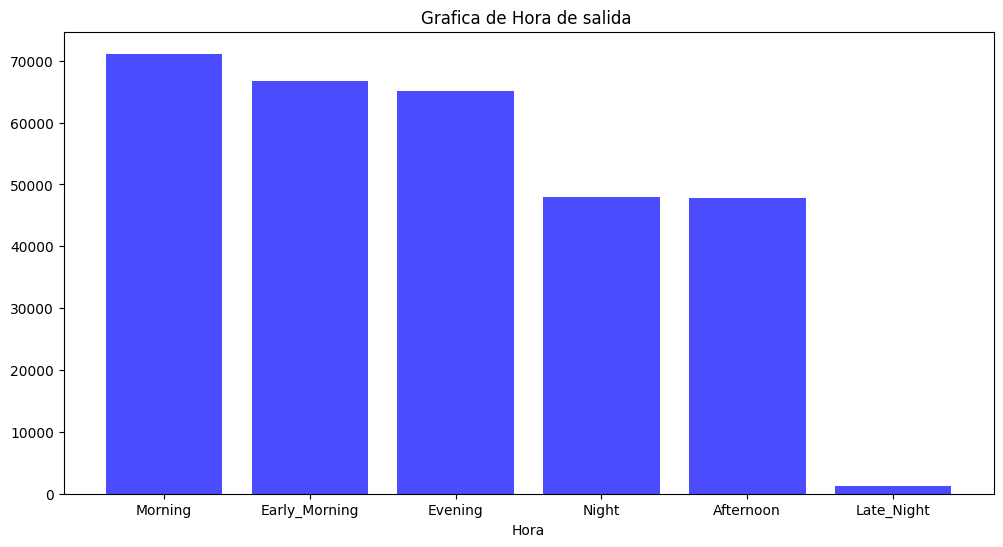

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(depar['departure_time'],depar['count'] , color='blue', alpha=0.7)
plt.title('Grafica de Hora de salida ')
plt.xlabel('Hora')
plt.show()

Late night es la variable que mas puede afectar al analisis y a la creacion de un modelo, pues hay una gran diferencia

In [ ]:
deptime = df['departure_time'].unique()
datatime = [df[df['departure_time'] == departure_time]['price'].values for departure_time in deptime]

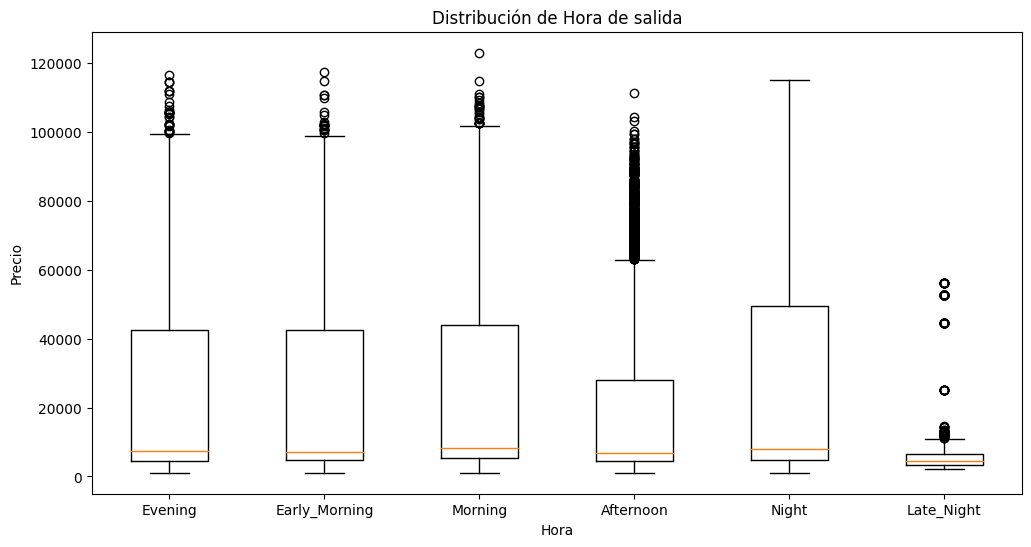

In [ ]:
plt.figure(figsize=(12, 6))
plt.boxplot(datatime, labels=deptime)
plt.title('Distribución de Hora de salida')
plt.xlabel('Hora')
plt.ylabel('Precio')
plt.show()

In [ ]:
promDepar = df.groupby('departure_time')['price'].agg(['mean', 'std'])
promDepar.columns = ['mean_price', 'std_price']
promDepar

mean_price     std_price
departure_time                            
Afternoon       18179.203331  20928.840445
Early_Morning   20370.676718  22354.875275
Evening         21232.361894  23168.515406
Late_Night       9295.299387  13680.515549
Morning         21630.760254  22968.909569
Night           23062.146808  23617.883277

Notamos al igual que en los graficos que hay una gran diferencia entre el promedio de precio en cuanto a la hora de NIGHT la cual es el promedio mas grande y LATE NIGHT el cual es el costo menor,  

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
# Codificar la variable objeto
df['hora_salida_codi'] = label_encoder.fit_transform(df['departure_time'])

In [ ]:
corre2= df['price'].corr(df['hora_salida_codi'])
corre2

0.058318732324466944

Es una correlacion menor que la obtenida en la pregunta anterior, sin embargo consideramos que es buena debido a que trabajamos con una variable codificada, por lo que existe una gran correlacion entre el precio y la hora de salida, asi como lo notamos en los graficos

In [ ]:
arrival=pd.DataFrame(df.arrival_time.value_counts())
arrival

count
arrival_time        
Night          91538
Evening        78323
Morning        62735
Afternoon      38139
Early_Morning  15417
Late_Night     14001

In [ ]:
arrival=arrival.reset_index()
arrival

arrival_time  count
0          Night  91538
1        Evening  78323
2        Morning  62735
3      Afternoon  38139
4  Early_Morning  15417
5     Late_Night  14001

In [ ]:
df.arrival_time.describe()

count     300153
unique         6
top        Night
freq       91538
Name: arrival_time, dtype: object

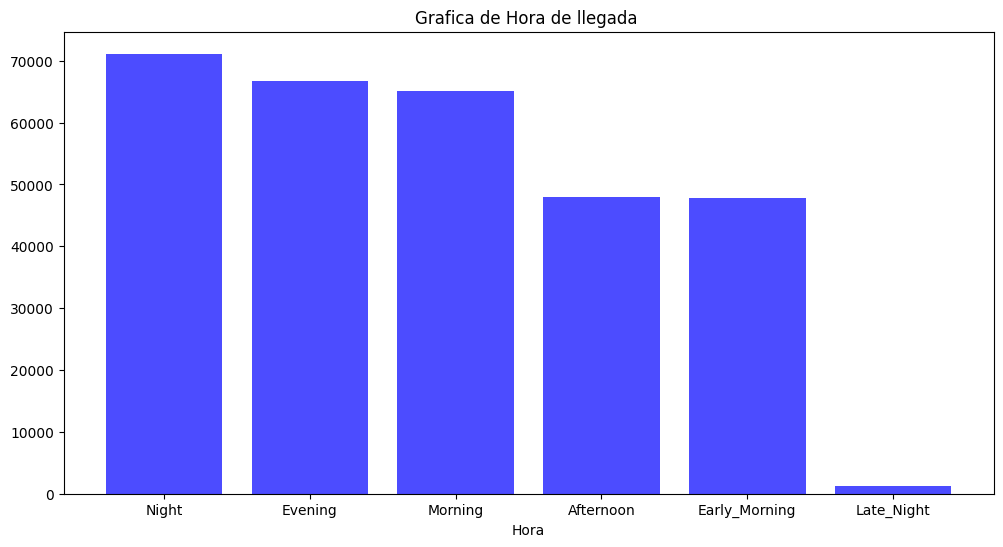

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(arrival['arrival_time'],depar['count'] , color='blue', alpha=0.7)
plt.title('Grafica de Hora de llegada ')
plt.xlabel('Hora')
plt.show()

In [ ]:
arrivtime = df['arrival_time'].unique()
dataarriva = [df[df['arrival_time'] == arrival_time]['price'].values for arrival_time in arrivtime]

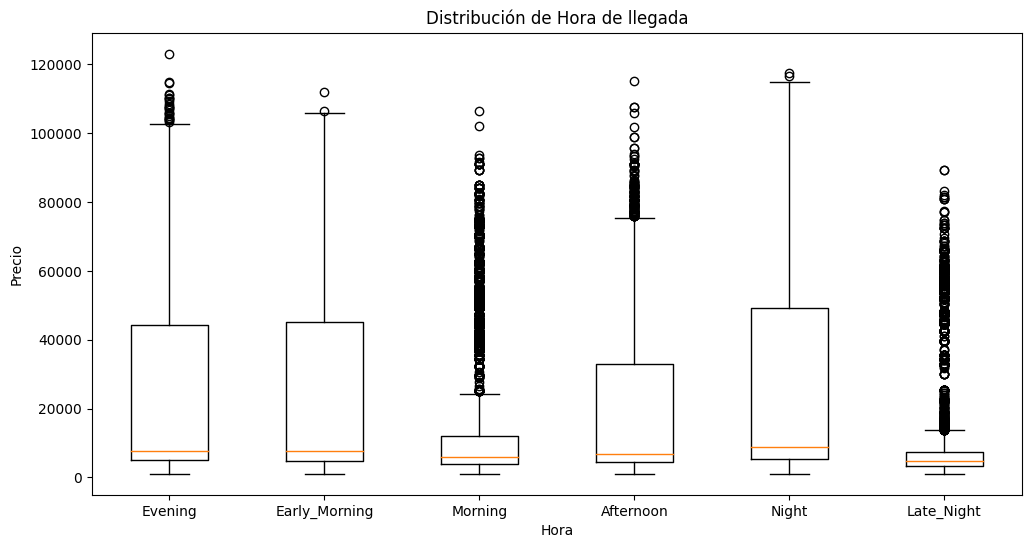

In [ ]:
plt.figure(figsize=(12, 6))
plt.boxplot(dataarriva, labels=deptime)
plt.title('Distribución de Hora de llegada')
plt.xlabel('Hora')
plt.ylabel('Precio')
plt.show()

In [ ]:
promArriv = df.groupby('arrival_time')['price'].agg(['mean', 'std'])
promArriv.columns = ['mean_price', 'std_price']
promArriv

mean_price     std_price
arrival_time                             
Afternoon      18494.598993  20430.012514
Early_Morning  14993.139521  18898.694495
Evening        23044.371615  23494.642663
Late_Night     11284.906078  16399.121594
Morning        22231.076098  23266.076096
Night          21586.758341  23298.011624

In [ ]:
promDepar

mean_price     std_price
departure_time                            
Afternoon       18179.203331  20928.840445
Early_Morning   20370.676718  22354.875275
Evening         21232.361894  23168.515406
Late_Night       9295.299387  13680.515549
Morning         21630.760254  22968.909569
Night           23062.146808  23617.883277

In [ ]:
diferencia= promArriv['mean_price'] - promDepar['mean_price']

In [ ]:
df_diferencia = pd.DataFrame({
    'aerolinea': promArriv.index,
    'diferencia_precio': diferencia
})

In [ ]:
df_diferencia

aerolinea  diferencia_precio
arrival_time                                   
Afternoon          Afternoon         315.395662
Early_Morning  Early_Morning       -5377.537197
Evening              Evening        1812.009721
Late_Night        Late_Night        1989.606691
Morning              Morning         600.315844
Night                  Night       -1475.388467

Notemos que la diferencia entre los promedios de precios de la hora de salida y de la hora de llegada no cambian demasiado en la mayoria de las horas escogidas, por lo que para la RESPUESTA 3 podemos decir que el precio no cambia significativamente entre la hora de salida y la hora de llegada.

-355.93295762021415